# Advanced analytics

In [1]:
import re
import io
import operator
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

from fa2 import ForceAtlas2

Tools

In [2]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

def format_link(link):
    sep = ' |'
    rest = link.split(sep, 1)[0]
    return rest

# A) Visualize the house of representatives network

## Exercice 1

Pick one of the houses of representatives (113th, 114th, 115th), and build the network.

### Importing data

In [3]:
path_folder = "../Week4/politicians/115th/"

In [4]:
df_115 = pd.read_csv('../Week4/houses/H115.csv', encoding = 'utf-8')
df_115['Congress Number'] = 115

In [5]:
formated_names = []

for i in range(0,len(df_115)):
    name = df_115.iloc[i].WikiPageName.replace('_',' ')
    if is_ascii(name):
        formated_names.append(name)

### Creating the Network

In [6]:
G = nx.DiGraph()

In [7]:
edges = []
valid_links = []

for i in range(0,len(df_115)):
    member_name = df_115.iloc[i].WikiPageName.replace('_',' ')
    member_party = df_115.iloc[i].Party
    member_state = df_115.iloc[i].State
    
    if is_ascii(member_name):
        # adding nodes & their attributes
        G.add_node(member_name, State=member_state, Party=member_party)
        
        # searching for links
        f = io.open(path_folder + df_115.iloc[i].WikiPageName + '.txt','r', encoding = 'utf-8').read()
        links = re.findall("\[\[(.*?)\]\]",f)
        
        # sorting the links
        for link in links:
            for politician_name in formated_names:
                if (politician_name in link) and ('File:' not in link) and ('Image:' not in link) and (politician_name not in valid_links) and (politician_name != member_name):
                    valid_links.append(politician_name)
                    
        # saving links
        edges.append(valid_links)
        valid_links = []

In [8]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 432
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


In [9]:
# list(G.nodes)

In [10]:
nodes = list(G.nodes)

for j in range(0,len(nodes)):
    for k in edges[j]:
        G.add_edge(nodes[j],k)

In [11]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 432
Number of edges: 1734
Average in degree:   4.0139
Average out degree:   4.0139


## Exercice 2 - Plotting

In [118]:
color_map = []

for node in G.nodes().data():
    if node[1]["Party"] == "Democratic":
        color_map.append('#ff0000')
    elif node[1]["Party"] == "Republican":
        color_map.append('#0000ff')

In [119]:
degrees = []

for node in G.node():
    degrees.append(G.degree()[node])

In [120]:
# Creating fa2 object 

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=5.0,
                        strongGravityMode=False,
                        gravity=0.03,

                        # Log
                        verbose=True)

In [121]:
# Undirected version
F = nx.Graph(G)

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:20<00:00, 119.09it/s]


BarnesHut Approximation  took  2.70  seconds
Repulsion forces  took  16.87  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  0.59  seconds


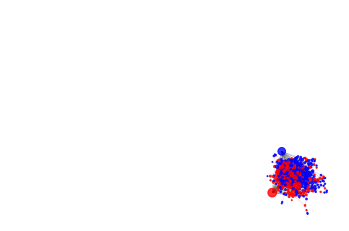

In [110]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2500)

nx.draw_networkx(G, positions, node_size = degrees, with_labels=False, node_color=color_map, alpha=0.8, width=0.1)

plt.axis('off')
plt.show()

Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes?

Compare the network you have produced with the one below, showing the link structures between political blogs (see the full article here). How do they differ?

## Exercice 3

In [133]:
dmax = 0

for e in list(G.out_degree):
    if (e[1] > dmax):
        dmax = e[1]
        max_out_member = e[0]
        
print(max_out_member + " has the highest out Degree")

Kevin McCarthy (California politician) has the highest out Degree


In [150]:
neighbors = list(G.neighbors(max_out_member))
neighbors

['Steve Scalise',
 'Nancy Pelosi',
 'Steny Hoyer',
 'Jim Clyburn',
 'Jim Jordan (American politician)',
 'Kevin Yoder',
 'Pete Sessions',
 'Jeb Hensarling',
 'Cathy McMorris Rodgers',
 'Trey Gowdy',
 'Dana Rohrabacher',
 'Paul Ryan',
 'Clay Higgins',
 'John Garamendi',
 'Jared Huffman',
 'Mike Thompson (California politician)',
 'Devin Nunes',
 'Dave Loebsack',
 'Jerry McNerney']

* What is the relation between the politician you identified and his/her network neighbours? (e.g. they work together, they come from the same town, they are opponents...)

* Repeat the exercise for the second largest out-degree node. Write down possible reasons why links exist between Wikipedia pages of politicians. Do all the links carry the same meaning?

They can be collegues, opponents, predecessor, successor, hierarchy

* Based on the observations above, can you partly explain the structure observed in Exercise 2?

Some politicians will appear most often than others if they are head of the house the chance that they can be mentioned is higher so they would have more link

# B) The structure of the house of representatives network

## Notes

* Clustering coefficient 
* Degree Distribution


* Mixing patterns for the hole network :
    * Helps knowing property of the network (like people of the same age marrying)
    * Assortative mixing is when similar nodes are getting together.
    * Dissasortative mixing is the contrary.
    * Often we look at degree ( big nodes getting together or big nodes having only small ones around )


* Paths
    * How does one node gets to another using the network
    * Centrality
    * Betweenness
    * Eigenvector centrality
    
* Cliques
    * Fully connected subgraph

## Exercice 4

<i> Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead? </i>

<b> For in and out degrees. Having a directed subgraph allow us to know the relations between people do they know each other is it a one way relationship etc. We could have used an undirected subgraph but then a lot of the information we have, would not make as much sense. </b>

<i> What is the total number of nodes in the network? What is the total number of links? The density of the network? </i>



In [153]:
print(nx.info(G))
print("Density: ", nx.density(G))

Name: 
Type: DiGraph
Number of nodes: 432
Number of edges: 1734
Average in degree:   4.0139
Average out degree:   4.0139
Density:  0.00931296725960299


<i> What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results? </i>

In [163]:
in_degrees = []
out_degrees = []

for node in G.node():
    out_degrees.append(G.out_degree()[node])
    in_degrees.append(G.in_degree()[node])

* In-degrees

In [164]:
in_average = np.mean(in_degrees)
in_median = np.median(in_degrees)
# in_mode 
in_minimum = np.amin(in_degrees)
in_maximum = np.amax(in_degrees)

print("In degrees")
print(f"Average: {in_average}")
print(f"Median: {in_median}")
print(f"Minimum: {in_minimum}")
print(f"Maximum: {in_maximum}")

In degrees
Average: 4.013888888888889
Median: 3.0
Minimum: 0
Maximum: 67


* Out-degrees

In [165]:
out_average = np.mean(out_degrees)
out_median = np.median(out_degrees)
# in_mode 
out_minimum = np.amin(out_degrees)
out_maximum = np.amax(out_degrees)

print("In degrees")
print(f"Average: {out_average}")
print(f"Median: {out_median}")
print(f"Minimum: {out_minimum}")
print(f"Maximum: {out_maximum}")

In degrees
Average: 4.013888888888889
Median: 3.0
Minimum: 0
Maximum: 19


<b> A few people are know by a lot of others, but there are few people with a lot of out connexions </b>

<i> List the top 5 politicians by in-degree and out-degree. What is their party and state? Do these politicians play a particular role in the house (see here)? </i>

In [167]:
sort_by_out = sorted(G.out_degree, key=lambda x: x[1], reverse=True)
sort_by_in = sorted(G.in_degree, key=lambda x: x[1], reverse=True)

In [170]:
print("TOP 5 - In degree")

for i in range(0,5):
    print(sort_by_in[i][0])

TOP 5 - In degree
Nancy Pelosi
Paul Ryan
Kevin McCarthy (California politician)
Steny Hoyer
Justin Amash


In [171]:
print("TOP 5 - Out degree")

for i in range(0,5):
    print(sort_by_out[i][0])

TOP 5 - Out degree
Kevin McCarthy (California politician)
Ro Khanna
Nancy Pelosi
Cathy McMorris Rodgers
Brad Sherman


<b> Yes most of those people have special positions (leaders, speakers, minority whip, chairwomans...) </b>

<i> Plot the distribution of in-degrees and out-degrees, binned using numpy.histogram. What is the most common in-degree? The most common out-degree?
 </i>

In [187]:
out_v = range(out_minimum, out_maximum+1)

out_hist = np.histogram(out_degrees, bins=out_v)

# Reducing the arrays to the same size (this time the data is discrete so 
# we will just cut the last bin out)
out_bins = []
out_counts = []

for ii in range(0, len(out_hist[0])):
    out_bins.append(out_hist[1][ii])
    out_counts.append(out_hist[0][ii])

In [188]:
in_v = range(in_minimum, in_maximum+1)

in_hist = np.histogram(in_degrees, bins=in_v)

# Reducing the arrays to the same size (this time the data is discrete so 
# we will just cut the last bin in)
in_bins = []
in_counts = []

for ii in range(0, len(in_hist[0])):
    in_bins.append(in_hist[1][ii])
    in_counts.append(in_hist[0][ii])

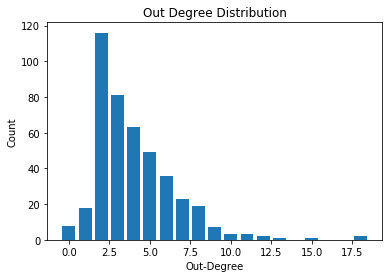

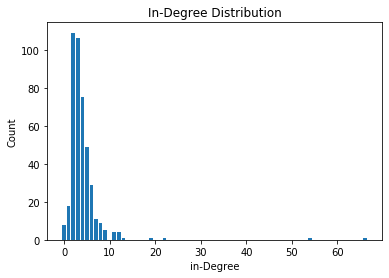

In [189]:
plt.subplot(111)
plt.bar(out_bins, out_counts)
plt.title("Out Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Out-Degree")
plt.show()

plt.subplot(111)
plt.bar(in_bins, in_counts)
plt.title("In-Degree Distribution")
plt.ylabel("Count")
plt.xlabel("in-Degree")
plt.show()

<b> Most common in and out degree is 2 </b>

<i> Plot the probability distribution of in-degrees and out-degrees one more time, this time plotted in loglog scale.</i>

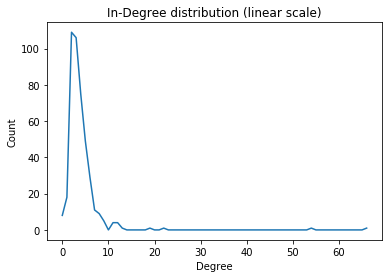

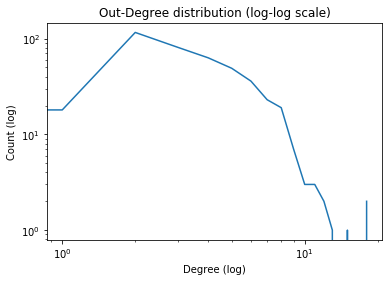

In [191]:
plt.subplot(111)
plt.plot(in_bins, in_counts)
plt.title("In-Degree distribution (linear scale)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

plt.subplot(111)
plt.loglog(out_bins, out_counts)
plt.title("Out-Degree distribution (log-log scale)")
plt.xlabel("Degree (log)")
plt.ylabel("Count (log)")
plt.show()

<i> Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between? </i>

<i> Plot a scatter plot of the the in- versus out- degree for all politicians. Comment on the relation between the two. </i>

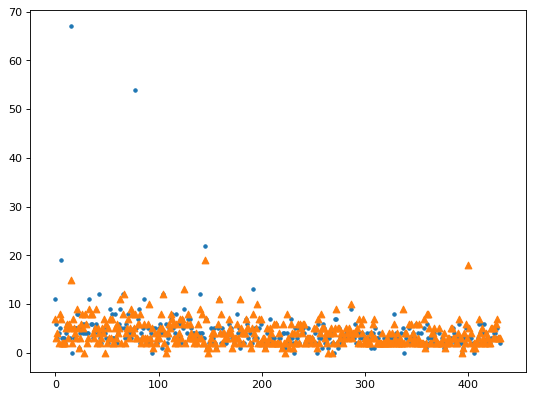

In [201]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(range(0,len(G.nodes())), in_degrees, marker='.')
plt.scatter(range(0,len(G.nodes())), out_degrees, marker='^')
plt.show()

<b> Most of the time the in-degree is higher than the out-degree, and for the hubs the in and out are way above average</b>

<i> Plot a heatmap (Hint here) of the the in- versus out- degree for all politicians. What is the advantage of using a heatmap? </i>

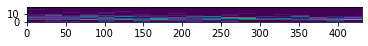

In [219]:
# Generate some test data
x = range(0,len(G.nodes))
y = out_degrees

heatmap, xedges, yedges = np.histogram2d(x, y, bins=out_maximum)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

## Exercice 5

In [14]:
giant = max(nx.weakly_connected_components(G), key=len)
giant_graph = nx.subgraph(G,giant)

In [23]:
F = nx.Graph(G)
un_giant = max(nx.connected_components(F), key=len)
un_giant_graph = nx.subgraph(F,giant)

<i> Find the 5 most central politicians according to betweenness centrality. What role do you imagine politicians with high wikipedia graph betweenness centrality play? </i>

In [17]:
node_btw_ctr = nx.betweenness_centrality(giant_graph)
sorted_btw = sorted(node_btw_ctr.items(), key=operator.itemgetter(1),reverse=True)

for i in range(0,5):
    print(sorted_btw[i])

('Nancy Pelosi', 0.22535672688233668)
('Kevin McCarthy (California politician)', 0.15358968262360712)
('Paul Ryan', 0.11287016143577897)
('Devin Nunes', 0.06593669993718991)
('Steve Scalise', 0.049866789648022714)


<b> Those persons are probably people with a big role in the houses </b>

<i> Find the 5 most central politicians according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details) </i>

In [32]:
node_eig = nx.eigenvector_centrality(G)
sorted_eig = sorted(node_eig.items(), key=operator.itemgetter(1),reverse=True)

for i in range(0,5):
    print(sorted_eig[i])


('Nancy Pelosi', 0.41917983715084967)
('Kevin McCarthy (California politician)', 0.3430922937431152)
('Paul Ryan', 0.33053379449052267)
('Steny Hoyer', 0.2869982980486963)
('Steve Scalise', 0.17587644306437406)


<i> Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why? </i>

In [33]:
btw_cent = nx.betweenness_centrality(G)
deg_cent = nx.degree_centrality(G)

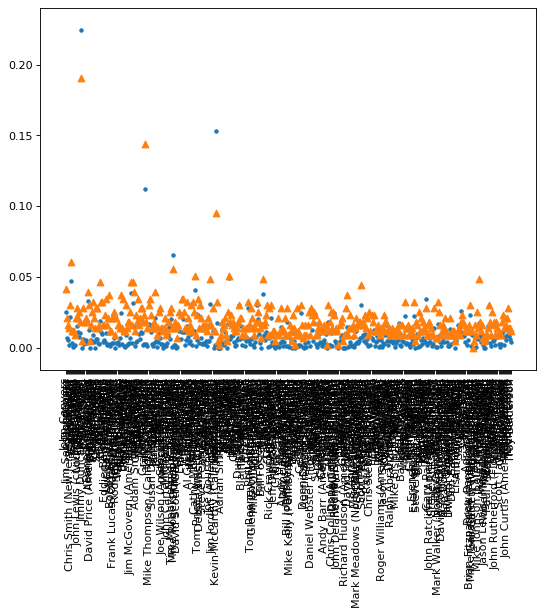

In [34]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(btw_cent.keys(), btw_cent.values(), marker='.')
plt.scatter(deg_cent.keys(), deg_cent.values(), marker='^')
plt.xticks(rotation=90)
plt.show()

<b> Yes there is a correlation between the betweeness centrality and degree centrality, Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. Then degree centrality defines the number of edges it has. 
    
So for our network it makes sense that the more connexion a node has the more she's gonna be in the middle of some other hence the more popular persons are gonna be bridges between other persons</b>

<i> Is the undirected version of the graph assortative with respect do degree? (e.g. do high-degree politicians tend to link to other high-degree politicians, and low-degree politicians to other low-degree politicians?). Provide an interpretation of your answer. </i>

In [35]:
nx.degree_assortativity_coefficient(F)

-0.003132021154197577

<b> ANSWER 

We have R = 0 so we have an uncorrelated network </b>

<i> What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes and p? </i>

In [38]:
nx.average_shortest_path_length(un_giant_graph)

3.704214104570226

<b> Similar to a ... Network </b>

## Exercice 6

<i> Compute the average node centrality for Democratic and Republican members of the house (choose your favourite centrality measure) </i>

In [71]:
btw_rep = {}
btw_dem = {}

In [72]:
for node in G.nodes().data():
    if node[1]["Party"] == "Democratic":
        btw_dem[node[0]] = btw_cent[node[0]]
    elif node[1]["Party"] == "Republican":
        btw_rep[node[0]] = btw_cent[node[0]]

In [78]:
avg_cent_dem = np.array([btw_dem[k] for k in btw_dem]).mean()
print(f"Average node centrality for Democrates : {avg_cent_dem}")

Average node centrality for Democrates : 0.008769044612725692


In [79]:
avg_cent_rep = np.array([btw_rep[k] for k in btw_rep]).mean()
print(f"Average node centrality for Republicans : {avg_cent_rep}")

Average node centrality for Republicans : 0.0081509948651799


<i> Create a new graph, with the same number of nodes and edges and the same degree distribution, but where the association between nodes and parties is shuffled. Compute the average centrality of Republicans and Democrats nodes for this randomized graph.</i>

In [86]:
E = nx.Graph(G)

'Name: \nType: Graph\nNumber of nodes: 432\nNumber of edges: 1154\nAverage degree:   5.3426'

In [89]:
for i in range(0,len(E.edges())):
    nx.double_edge_swap(E)

In [92]:
btw_cent = nx.betweenness_centrality(E)

In [83]:
dem = {}
rep = {}

for node in E.nodes().data():
    if node[1]["Party"] == "Democratic":
        dem[node[0]] = btw_cent[node[0]]
    elif node[1]["Party"] == "Republican":
        rep[node[0]] = btw_cent[node[0]]

In [91]:
avg_cent_dem = np.array([dem[k] for k in dem]).mean()
print(f"Average node centrality for Democrates : {avg_cent_dem}")

Average node centrality for Democrates : 0.006688587997326824


In [90]:
avg_cent_rep = np.array([rep[k] for k in rep]).mean()
print(f"Average node centrality for Republicans : {avg_cent_rep}")

Average node centrality for Republicans : 0.005006470294355176


<i> Repeat the point above 100 times (at least) and plot two histograms with the values of centrality obtained for Republicans and Democrats. </i>

In [94]:
avg_dem = []
avg_rep = []

for i in range(0,101):
    E = nx.Graph(G)
    
    for i in range(0,len(E.edges())):
        nx.double_edge_swap(E)
    
    btw_cent = nx.betweenness_centrality(E)
    
    dem = {}
    rep = {}

    for node in E.nodes().data():
        if node[1]["Party"] == "Democratic":
            dem[node[0]] = btw_cent[node[0]]
        elif node[1]["Party"] == "Republican":
            rep[node[0]] = btw_cent[node[0]]
            
    avg_dem.append(np.array([dem[k] for k in dem]).mean())
    avg_rep.append(np.array([rep[k] for k in rep]).mean())


101

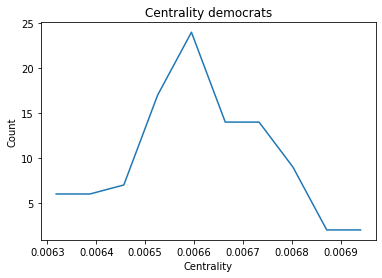

In [133]:
dem_minimum = np.amin(avg_dem)
dem_maximum = np.amax(avg_dem)

hist, bins = np.histogram(avg_dem, bins=10)
bins = bins[:-1]

plt.subplot(111)
plt.plot(bins, hist)
plt.title("Centrality democrats")
plt.ylabel("Count")
plt.xlabel("Centrality")
plt.show()

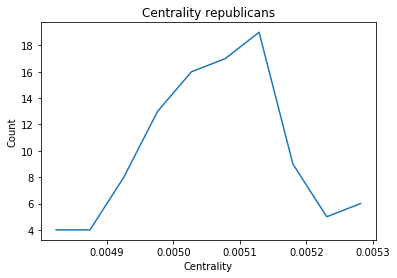

In [132]:
rep_minimum = np.amin(avg_rep)
rep_maximum = np.amax(avg_rep)

hist, bins = np.histogram(avg_rep, bins=10)
bins = bins[:-1]

plt.subplot(111)
plt.plot(bins, hist)
plt.title("Centrality republicans")
plt.ylabel("Count")
plt.xlabel("Centrality")
plt.show()

<i> Compare the value you have obtained in the real graph, with the randomized cases. Are members of one of the two parties more central in the network (on average)? </i>

<b> Answer </b>

<i> Think about your results, what could be possible explanations for what you observe?</i>

<b> Answer </b>

## Exercice 7

<i> Consider the undirected version of the graph. For each node, compute the fraction of edges that connect to a node of his/her same party. Find the average value across all nodes. </i>

In [12]:
fractions = []
for node in G.nodes:
    in_party = []
    neighbors = list(nx.neighbors(G,node))
    if(len(neighbors) != 0):
        for n in neighbors: 
            if(G.nodes()[node]["Party"] == G.nodes()[n]["Party"]):
                in_party.append(n)
        fraction = len(in_party)/len(neighbors)
        fractions.append(fraction)

print(f"Average fraction of members from the same party {np.mean(fractions)}")

Average fraction of members from the same party 0.6127024539512126


<i> Create a new graph, with the same nodes and edges, but where the association between nodes and parties is shuffled. Compute the measure above for this randomized graph.
 </i>

In [13]:
fractions = []
for node in E.nodes:
    in_party = []
    neighbors = list(nx.neighbors(E,node))
    if(len(neighbors) != 0):
        for n in neighbors: 
            if(E.nodes()[node]["Party"] == E.nodes()[n]["Party"]):
                in_party.append(n)
        fraction = len(in_party)/len(neighbors)
        fractions.append(fraction)

print(f"Average fraction of members from the same party {np.mean(fractions)}")

NameError: name 'E' is not defined

<i> Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Do you find that the chance to connect to a member of the same party is higher than it would be by random chance? </i>

In [14]:
avg = []

for i in range(0,101):
    E = nx.Graph(G)
    
    for i in range(0,len(E.edges())):
        nx.double_edge_swap(E)
    
    fractions = []
    for node in E.nodes:
        in_party = []
        neighbors = list(nx.neighbors(E,node))
        if(len(neighbors) != 0):
            for n in neighbors: 
                if(E.nodes()[node]["Party"] == E.nodes()[n]["Party"]):
                    in_party.append(n)
            fraction = len(in_party)/len(neighbors)
            fractions.append(fraction)

            avg.append(np.mean(fractions))

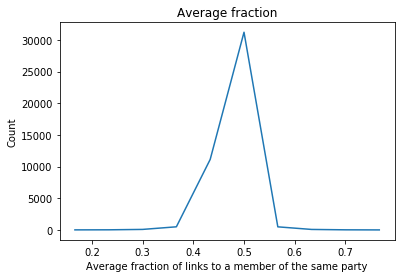

In [16]:
hist, bins = np.histogram(avg, bins=10)
bins = bins[:-1]

plt.subplot(111)
plt.plot(bins, hist)
plt.title("Average fraction")
plt.ylabel("Count")
plt.xlabel("Average fraction of links to a member of the same party")
plt.show()

<b> No chances are about the same </b>

<i>Compute the assortativity coefficient with respect to the party. How do you interpret the value you obtain? (Hint: See this paper, eq (2)). </i>

In [15]:
nx.attribute_assortativity_coefficient(G,"Party")

-0.01752298703063422

<b> ANSWER 
r=0 no links of asssortativity
</b>

<i> Repeat the exercise, but considering states instead of parties.
 </i>

In [17]:
avg = []

for i in range(0,101):
    E = nx.Graph(G)
    
    for i in range(0,len(E.edges())):
        nx.double_edge_swap(E)
    
    fractions = []
    for node in E.nodes:
        in_party = []
        neighbors = list(nx.neighbors(E,node))
        if(len(neighbors) != 0):
            for n in neighbors: 
                if(E.nodes()[node]["State"] == E.nodes()[n]["State"]):
                    in_party.append(n)
            fraction = len(in_party)/len(neighbors)
            fractions.append(fraction)

            avg.append(np.mean(fractions))

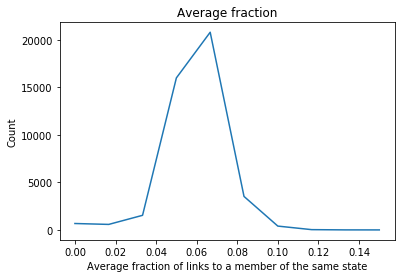

In [18]:
hist, bins = np.histogram(avg, bins=10)
bins = bins[:-1]

plt.subplot(111)
plt.plot(bins, hist)
plt.title("Average fraction")
plt.ylabel("Count")
plt.xlabel("Average fraction of links to a member of the same state")
plt.show()

In [19]:
nx.attribute_assortativity_coefficient(E,"State")

0.010606132167985007

<b> ANSWER 
r=0 no links of asssortativity
</b>

<i> How do you interpret these results in light of what you have observed in Exercise 3? </i>

That the links between members are more about their position inside the congress than their party or state.